# <center><i>BanK Loan Default Case</i></center>

In [1]:
#importing libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score,precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
%matplotlib inline

In [62]:
#path for dataset
os.chdir("C://Users//Shubh Gupta//Desktop//DataScience//Project//Bank-loan")

In [63]:
#loading the dataset
df=pd.read_csv("bank-loan.csv")

In [64]:
#exploring the dataset
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [65]:
#shape of the dataset
df.shape

(850, 9)

In [66]:
#describing the dataset
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


# Missing Value Analysis

In [67]:
#missing values for the dataset
missing_value=pd.DataFrame(df.isnull().sum()).rename(columns={0:'count'})
missing_value

,count
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,150


# Observation

<i>In all the 9 variables, we have 150 missing values in the default predictor which is our target or dependent variable. Since imputing data in a target variable could result into negative impact on our model, so we will drop observations associated with these 150 missing values.</i>

In [68]:
#creating new dataframe with 700 observations
df_new = pd.DataFrame(df[:700])

In [69]:
#shape of new dataset
df_new.shape

(700, 9)

In [70]:
#describing the new dataset
df_new.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [71]:
#performing missing values analysis on a new dataset
missing_value_new=pd.DataFrame(df_new.isnull().sum()).rename(columns={0:'count'})
missing_value_new

,count
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


# Observation

<i>Now we have a new dataset with 700 observations and 9 variables with no missing values.</i>

# Splitting the data into train and test

In [72]:
#dividing the data into train and test 
ran_split = np.random.rand(len(df_new)) < 0.8
train = df_new[ran_split]
test = df_new[~ran_split]

In [73]:
#shape of train data
train.shape

(565, 9)

In [74]:
#shape of test data
test.shape

(135, 9)

In [75]:
#exploring the train data
train.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0


In [76]:
#exploring the test data
test.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
15,36,2,9,6,49,8.6,0.817516,3.396484,1.0
17,43,1,23,19,72,7.6,1.181952,4.290048,0.0


# Observation

<i>Through splitting the data, we have now 565 observations in the train data and 135 observations in the test data.</i>

# Distribution of Target Variable in the Train Data

# <i>Bar Graph</i>

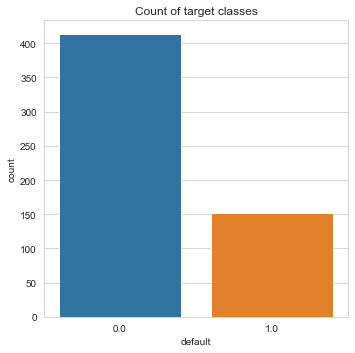

In [77]:
#generating the bar graph for both the classes of a target variable in the train data
plt.figure(figsize = (12,12))
plt.subplot(221)
plt.title("Count of target classes")
sns.countplot(train.default)

# Pie Chart

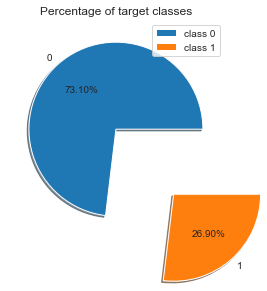

In [78]:
#generating the pie chart for both the classes of a target variable in the train data
plt.pie(train.default.value_counts() , labels=[0,1] ,autopct='%1.2f%%' ,explode=(0,1) , shadow=True)
plt.legend(['class 0','class 1'])
plt.title("Percentage of target classes")
plt.show()

# Observations

<i>
1. The dataset is imbalanced.<br/>
2. The number of data points in class 0 is approximately 73%.<br/>
3. The number of data points in class 1 is approximately 27%.<br/>
4. The number of customers that will have a default status are comparatively less as compared to those who will have a non-default status.
</i>

# Splitting the train data into dependent and independent variables

In [79]:
#dividing the training dataset into dependent and independent variables
independent_var = [i for i in train.columns.values if i!='default']
X = train[independent_var]
Y = train.default

In [80]:
#shape of independent variables
X.shape

(565, 8)

In [81]:
#exploring independent variable
X.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
4,24,2,2,0,28,17.3,1.787436,3.056564
6,39,1,20,9,67,30.6,3.833874,16.668126


In [82]:
#shape of dependent variable
Y.shape

(565,)

In [83]:
#exploring dependent variable
Y.head()

0    1.0
1    0.0
2    0.0
4    1.0
6    0.0
Name: default, dtype: float64

# Multicollinearity Analysis

In [84]:
#function to calculate VIF(Variance Inflation Factor)
VIF = pd.DataFrame()
VIF["features"] = X.columns
VIF["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

,features,vif
0,age,17.562240
1,ed,5.112207
2,employ,5.576546
3,address,3.569253
4,income,10.524638
5,debtinc,8.761947
6,creddebt,4.116065
7,othdebt,6.322753


# Observation

<i>Since no two variables have the same variance  inflation factor. So we can continue with our modelling with all the eight independent features.</i>

# Distribution of Independent Variables

In [85]:
#checking the distribution of independent variables
def check_distribution(X):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    names =list(range(0,8))
    for i , realindex in  enumerate(names,1):
        ax = fig.add_subplot( 5,4, i)
        sns.distplot(X.iloc[:,realindex] ,ax=ax)
    plt.show()

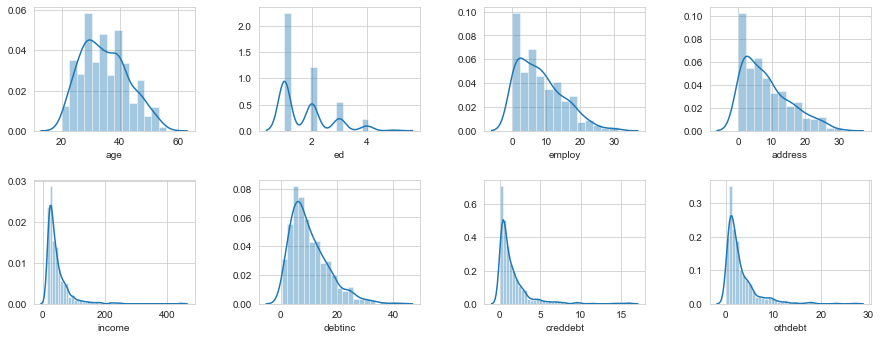

In [86]:
#pair plots
check_distribution(X)

# Observation

<i>From the above plots, we can conclude that none of the independent variables are normally distributed.<br/> All the eight predictors are positive or right skewed.</i>

# Outlier Analysis

In [87]:
#box plot for checking outliers in the dataset
def box_plot(data):
    l = data.columns.values
    number_of_columns=8
    number_of_rows = len(l)-1/number_of_columns
    plt.figure(figsize=(number_of_columns,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],color='skyblue',orient='v')
        plt.tight_layout()   

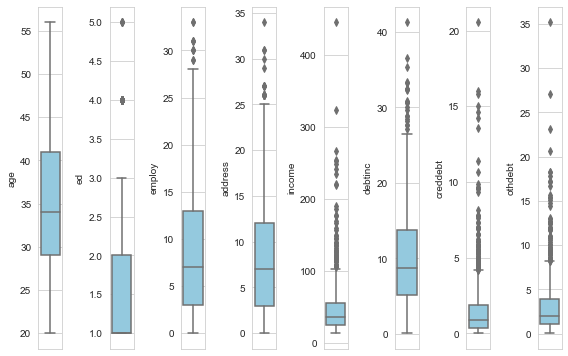

In [88]:
#checking the outliers in the dataset
box_plot(X)

# Observation

<i>Data points which are below lower fence and above upper fence will be declared as outliers.</i>

# Remove Outliers

In [89]:
#function to replace outliers with NaN
def remove_outlier_fillna(data ,var_list):
    for i in var_list:
        q75 ,q25 = np.percentile(data.loc[:,i] ,[75,25])
        iqr =q75-q25
        minimum = q25 -(1.5*iqr)
        maximum =q75+(1.5*iqr)
        print(i,"iqr",iqr,"mimimum",minimum ,"maximum",maximum,sep=" : ")
        data.loc[data[i]<minimum ,i]=np.nan
        data.loc[data[i]>maximum ,i]=np.nan     
    return data

In [90]:
#replace outliers with NaN
selected_var = X.columns.values
X = remove_outlier_fillna(X.copy() ,selected_var)

age : iqr : 11.0 : mimimum : 12.5 : maximum : 56.5
ed : iqr : 1.0 : mimimum : -0.5 : maximum : 3.5
employ : iqr : 10.0 : mimimum : -12.0 : maximum : 28.0
address : iqr : 10.0 : mimimum : -12.0 : maximum : 28.0
income : iqr : 30.0 : mimimum : -21.0 : maximum : 99.0
debtinc : iqr : 8.4 : mimimum : -7.200000000000001 : maximum : 26.400000000000002
creddebt : iqr : 1.5448439999999999 : mimimum : -1.946196 : maximum : 4.23318
othdebt : iqr : 2.797054 : mimimum : -3.1472350000000007 : maximum : 8.040981


# Missing Values Imputation

In [91]:
#total missing values
print(X.isnull().sum().sum())

176


In [92]:
#missing value percentage
print(X.isnull().mean()*100)

age         0.000000
ed          5.840708
employ      0.707965
address     0.530973
income      6.725664
debtinc     2.654867
creddebt    7.433628
othdebt     7.256637
dtype: float64


# Standardization

In [93]:
#function for scaling the dataset
def std_data(data): 
    scaler =StandardScaler()
    return pd.DataFrame(scaler.fit_transform(data) ,columns=data.columns)

In [94]:
#standardizing the dataset
X = std_data(X)

# Model Training

<i>We will use three models for training the dataset :-<br/>
1. Logistic Regression<br/>
2. Decision Tree<br/>
3. XGBoost</i>

# Generic Function

In [95]:
#function to plot roc curve 
def roc_plot(Y_true ,Y_prob ,model="model") :
  fpr, tpr, thresholds =roc_curve(Y_true, Y_prob)
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.title('ROC curve for  %s'%model)
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)
  plt.show()
  print('  AUC: %.3f' % auc(fpr,tpr))
    
#this function return a dictinary of model performance criteria
def model_accuracy(conf_matrix): 
    model_pram={}
    tn =conf_matrix.iloc[0,0]
    tp =conf_matrix.iloc[1,1]
    fp =conf_matrix.iloc[0,1]
    fn =conf_matrix.iloc[1,0]
    model_pram['precision'] =(tp)/(tp+fp)
    model_pram['accuracy']  =(tp+tn)/(tp+tn+fp+fn)
    model_pram['recall']  =(tp)/(tp+fn)
    model_pram['specificity'] =(tn)/(tn +fp)
    model_pram['fpr'] =(fp)/(fp+tn)
    model_pram['fnr'] =(fn)/(fn+tp)
    model_pram['f1'] =2*(( model_pram['precision'] *model_pram['recall'])/( model_pram['precision'] +model_pram['recall']))
    return model_pram
  
#function to calculate confusion matrix 
def run_model(model_object, X,Y,model_name):
    pred_prob = model_object.predict_proba(X)[:, 1] 
    y_pred=model_object.predict(X)
    conf =pd.crosstab(Y,y_pred)  
    print(model_accuracy(conf))
    roc_plot(Y ,pred_prob ,model_name)
    return conf

# Logistic Regression

In [96]:
#function for cleaning the dataset
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [97]:
#cleaning the independent variables
clean_dataset(X)

,age,ed,employ,address,income,debtinc,creddebt,othdebt
1,-0.982675,-0.804246,0.281391,-0.346415,-0.372202,1.301211,0.293685,0.953084
2,0.649192,-0.804246,1.059028,0.824624,0.889892,-0.706554,-0.245126,-0.086069
3,-1.359259,0.584906,-0.962828,-1.224695,-0.529964,1.301211,0.746379,0.417455
5,-1.359259,-0.804246,-0.807301,-0.639175,-1.003249,2.509272,0.289582,0.542870
6,0.147079,-0.804246,-1.273883,0.678244,-0.687726,1.709569,1.800590,-0.098336
...,...,...,...,...,...,...,...,...
560,0.147079,0.584906,-0.340719,0.971004,-0.582551,-0.859688,-0.877498,-0.760537
561,-0.731618,0.584906,-0.340719,-0.639175,-0.898075,0.314343,-0.763128,-0.156081
562,-0.229505,-0.804246,1.059028,-0.785555,-0.319615,-0.349240,-0.633495,-0.215512
563,1.276833,-0.804246,1.681137,1.995664,2.046812,-0.213120,1.294819,1.046452


In [98]:
#reset the index of independent variables
X=X.reset_index()

In [99]:
#checking after resetting the index
X.head()

,index,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,1,-0.982675,-0.804246,0.281391,-0.346415,-0.372202,1.301211,0.293685,0.953084
1,2,0.649192,-0.804246,1.059028,0.824624,0.889892,-0.706554,-0.245126,-0.086069
2,3,-1.359259,0.584906,-0.962828,-1.224695,-0.529964,1.301211,0.746379,0.417455
3,5,-1.359259,-0.804246,-0.807301,-0.639175,-1.003249,2.509272,0.289582,0.542870
4,6,0.147079,-0.804246,-1.273883,0.678244,-0.687726,1.709569,1.800590,-0.098336


In [100]:
#drop index column
X=X.drop(['index'], axis = 1) 
X

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,-0.982675,-0.804246,0.281391,-0.346415,-0.372202,1.301211,0.293685,0.953084
1,0.649192,-0.804246,1.059028,0.824624,0.889892,-0.706554,-0.245126,-0.086069
2,-1.359259,0.584906,-0.962828,-1.224695,-0.529964,1.301211,0.746379,0.417455
3,-1.359259,-0.804246,-0.807301,-0.639175,-1.003249,2.509272,0.289582,0.542870
4,0.147079,-0.804246,-1.273883,0.678244,-0.687726,1.709569,1.800590,-0.098336
...,...,...,...,...,...,...,...,...
446,0.147079,0.584906,-0.340719,0.971004,-0.582551,-0.859688,-0.877498,-0.760537
447,-0.731618,0.584906,-0.340719,-0.639175,-0.898075,0.314343,-0.763128,-0.156081
448,-0.229505,-0.804246,1.059028,-0.785555,-0.319615,-0.349240,-0.633495,-0.215512
449,1.276833,-0.804246,1.681137,1.995664,2.046812,-0.213120,1.294819,1.046452


In [101]:
#creating the subset of target variable
y=Y.head(451)
y

0      1.0
1      0.0
2      0.0
4      1.0
6      0.0
      ... 
550    1.0
551    1.0
553    0.0
554    0.0
556    0.0
Name: default, Length: 451, dtype: float64

In [102]:
#reset the index of dependent variable
Y=y.reset_index()

In [103]:
#checking after resetting the index
Y.head()

,index,default
0,0,1.0
1,1,0.0
2,2,0.0
3,4,1.0
4,6,0.0


In [104]:
#drop index column
Y=Y.drop(['index'], axis = 1) 
Y

,default
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
446,1.0
447,1.0
448,0.0
449,0.0


{'precision': 0.30097087378640774, 'accuracy': 0.5609756097560976, 'recall': 0.5344827586206896, 'specificity': 0.5701492537313433, 'fpr': 0.4298507462686567, 'fnr': 0.46551724137931033, 'f1': 0.3850931677018633}


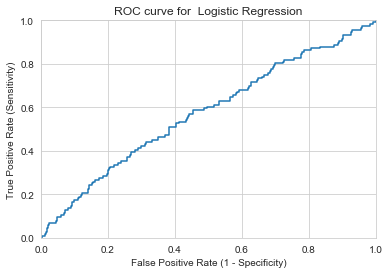

  AUC: 0.574


In [105]:
#applying logistic regression on the imbalanced dataset
logit_model =LogisticRegression(class_weight='balanced')
logit_model.fit(X,y)
confMatrix=run_model(logit_model,X,y,"Logistic Regression")

# Observations 

<table>
<tr>
     <th><i>Evaluation Metrics</i></th>
     <th><i>Percentage Values</i></th>
 </tr> 
  <tr>
     <td>Accuracy</td>
     <td>56.09%</td>
 </tr> 
 <tr>
     <td>Recall</td>
     <td>53.44%</td>
 </tr>
 <tr>
     <td>Precision</td>
     <td>30.09%</td>
 </tr>
 <tr>
     <td>Specificity</td>
     <td>57.01%</td>
 </tr>
 <tr>
     <td>FPR</td>
     <td>42.98%</td>
 </tr> 
 <tr>
     <td>FNR</td>
     <td>46.55%</td>
 </tr> 
 <tr>
     <td>F1 Score</td>
     <td>38.50%</td>
 </tr>
 <tr>
     <td>AUC</td>
     <td>57.4%</td>
 </tr>
</table>    

# Decision Tree

{'precision': 0.4779874213836478, 'accuracy': 0.7272727272727273, 'recall': 0.6551724137931034, 'specificity': 0.7522388059701492, 'fpr': 0.24776119402985075, 'fnr': 0.3448275862068966, 'f1': 0.5527272727272727}


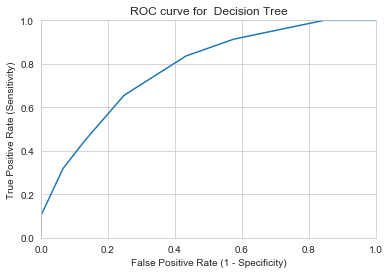

  AUC: 0.779


In [106]:
#applying decision tree on the imbalanced dataset
dt_model = DecisionTreeClassifier( max_depth= 5,class_weight='balanced')
dt_model.fit(X,y)
confMatrix=run_model(dt_model,X,y,"Decision Tree")

# Observations

<table>
<tr>
     <th><i>Evaluation Metrics</i></th>
     <th><i>Percentage Values</i></th>
 </tr> 
  <tr>
     <td>Accuracy</td>
     <td>72.72%</td>
 </tr> 
 <tr>
     <td>Recall</td>
     <td>65.51%</td>
 </tr>
 <tr>
     <td>Precision</td>
     <td>47.79%</td>
 </tr>
 <tr>
     <td>Specificity</td>
     <td>75.22%</td>
 </tr>
 <tr>
     <td>FPR</td>
     <td>24.77%</td>
 </tr> 
 <tr>
     <td>FNR</td>
     <td>34.48%</td>
 </tr> 
 <tr>
     <td>F1 Score</td>
     <td>55.27%</td>
 </tr>
 <tr>
     <td>AUC</td>
     <td>77.9%</td>
 </tr>
</table>    

# Random Forest

{'precision': 0.9607843137254902, 'accuracy': 0.9512195121951219, 'recall': 0.8448275862068966, 'specificity': 0.9880597014925373, 'fpr': 0.011940298507462687, 'fnr': 0.15517241379310345, 'f1': 0.8990825688073395}


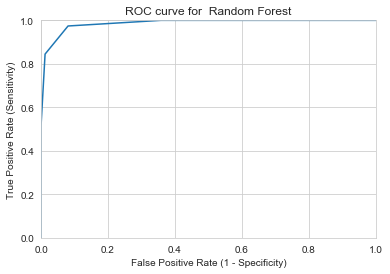

  AUC: 0.986


In [110]:
#applying random forest on the imbalanced dataset
rf_model = RandomForestClassifier(n_estimators = 5,class_weight='balanced')
rf_model.fit(X,y)
confMatrix=run_model(rf_model,X,y,"Random Forest")

# Observations

<table>
<tr>
     <th><i>Evaluation Metrics</i></th>
     <th><i>Percentage Values</i></th>
 </tr> 
  <tr>
     <td>Accuracy</td>
     <td>95.12%</td>
 </tr> 
 <tr>
     <td>Recall</td>
     <td>84.48%</td>
 </tr>
 <tr>
     <td>Precision</td>
     <td>96.07%</td>
 </tr>
 <tr>
     <td>Specificity</td>
     <td>98.80%</td>
 </tr>
 <tr>
     <td>FPR</td>
     <td>1.194%</td>
 </tr> 
 <tr>
     <td>FNR</td>
     <td>15.51%</td>
 </tr> 
 <tr>
     <td>F1 Score</td>
     <td>89.90%</td>
 </tr>
 <tr>
     <td>AUC</td>
     <td>98.6%</td>
 </tr>
</table>    

# Comparing all the three models

<table>
<tr>
    <th></th>
    <th>Accuracy</th>
    <th>Recall</th>
    <th>Precision</th>
    <th>Specificity</th>
    <th>FPR</th>
    <th>FNR</th>
    <th>F1 Score</th>
    <th>AUC</th>
</tr>
    <tr></tr>
<tr>
    <th>Logistic Regression</th>
    <td>0.5609</td>
    <td>0.5344</td>
    <td>0.3009</td>
    <td>0.5701</td>
    <td>0.4298</td>
    <td>0.4655</td>
    <td>0.3850</td>
    <td>0.574</td>
</tr>
    <tr></tr>
<tr>
    <th>Decision Tree</th>
    <td>0.7272</td>
    <td>0.6551</td>
    <td>0.4779</td>
    <td>0.7522</td>
    <td>0.2477</td>
    <td>0.3448</td>
    <td>0.5527</td>
    <td>0.779</td>
</tr>
    <tr></tr>
<tr>
    <th>Random Forest</th>
    <td>0.9512</td>
    <td>0.8448</td>
    <td>0.9607</td>
    <td>0.9880</td>
    <td>0.0119</td>
    <td>0.1551</td>
    <td>0.8990</td>
    <td>0.986</td>
</tr>
</table>

# Model Selection

<i>The model should be selected based on the following parameters :-<br/>
1. High Accuracy<br/>
2. High F1 Score<br/>
3. High AUC Score<br/>
4. High Recall<br/>
5. High Precision<br/>
6. High Specificity<br/>
7. Low FPR<br/>
8. Low FNR

# Freezed Model

<i>Since Random Forest performs better than others models based on the above parameters, we will use Random Forest model for the test data.</i>